# 4.3 적분
- 부정적분 
- 편미분의 부정적분
- 정적분 
- 수치적분
- 다변수 정적분

In [4]:
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
import sympy
from scipy.misc import derivative
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import sklearn as sk

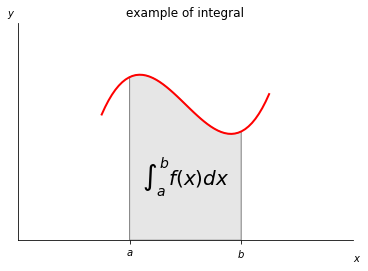

In [20]:
def f(x):
    return x**3-3*x**2+x+6
a,b = 0,2
x=np.linspace(a-0.5,b+0.5,50)
y=f(x)

ax = plt.subplot(111)
plt.title('example of integral')
plt.plot(x,y,'r',linewidth=2)
plt.ylim(bottom=0)
ix = np.linspace(a,b)
iy = f(ix)
verts = [(a,0)]+list(zip(ix,iy)) + [(b,0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.5 * (a+b), 0.2*(f(a)+f(b)), r'$\int_a^b f(x)dx$', horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.05, '$x$')
plt.figtext(0.1, 0.9, '$y$')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks((a,b))
ax.set_xticklabels(('$a$','$b$'))
ax.set_yticks([])
ax.set_xlim(-2,4)
ax.set_ylim(0,8)

plt.show()

정적분 구하기 방법 1

In [21]:
x,y = sympy.symbols('x y')
f = x**3-3*x**2+x+6
f

x**3 - 3*x**2 + x + 6

In [22]:
F = sympy.integrate(f)
F

x**4/4 - x**3 + x**2/2 + 6*x

In [23]:
(F.subs(x,2)-F.subs(x,0)).evalf()

10.0000000000000

정적분 구하기 방법 2(수치적분)

In [25]:
def f(x):
    return x**3 -3*x**2 +x +6
sp.integrate.quad(f,0,2)
#오른쪽 값은 오차범위.. 1 over 10조.. 즉 오차범위는 없다. 

(10.0, 1.1102230246251565e-13)

4.3.5 연습문제
아래 문재들의 정적분 값을 부정적분과 수치적분으로 구해보기. 

$\int_{0}^{1}(3x^2-6x+1) dx$

In [27]:
#정적분 
x = sympy.symbols('x')
f = 3*x**2-6*x+1 #도함수 공식
F = sympy.integrate(f) #도함수 적분 
(F.subs(x,1) - F.subs(x,0).evalf()) #정적분 

-1

In [33]:
#수치적분 
def f(x):
    return 3*x**2-6*x+1
sp.integrate.quad(f,0,1)

(-1.0, 1.3085085171449517e-14)

$\int_{1}^{10}(3x^2-6x+1) dx$

In [34]:
#정적분
x = sympy.symbols('x')
f = 2+(6*x)+(4*sympy.exp(x))+(5/x) #도함수 공식 
F = sympy.integrate(f)
(F.subs(x,10)-F.subs(x,1).evalf())

5*log(10) + 304.126872686164 + 4*exp(10)

In [35]:
#수치적분 
def f(x):
    return 2+(6*x)+(4*sympy.exp(x))+(5/x)
sp.integrate.quad(f,1,10)

(88421.50297737827, 1.5276890734473408e-06)

다변수 정적분    
입력 변수가 2개인 2차원 함수 f(x,y)의 경우에는 정적문을 당양한 방법으로 정의할 수 있다.    
두 변수로 모두 적분하는 것은 2차원 평명에서 주어진 사각형 영역 아래의 부피를 구하는 것과 같다.    

$\int_{y=0}^{y=6}\int_{x=2}^{x=8}(x^2-10x+y+50) dxdy$

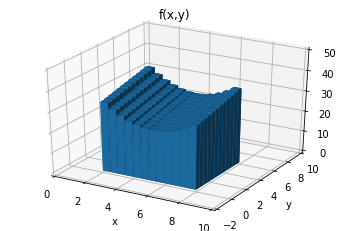

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
_x = np.arange(12)/2+2
_y = np.arange(12)/2
X, Y = np.meshgrid(_x,_y)
x,y = X.ravel(),Y.ravel()
z=x*x-10*x+y+50
z0=np.zeros_like(z)
ax.bar3d(x,y,z0,0.48,0.48,z)
ax.set_xlim(0,10)
ax.set_ylim(-2,10)
ax.set_zlim(0,50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('f(x,y)')
plt.show()

In [62]:
#이중 적분
#x가 2에서 8 그리고 y가 0에서 6인 부분의 부피. 
def f(x,y):
    return x*x-10*x+y+50
sp.integrate.dblquad(f,2,8,lambda x:0,lambda x:6)

(1332.0000000000002, 1.4788170688007088e-11)

|예제|
  $\int_{y=0}^{y=\infty}\int_{x=1}^{x=\infty}\frac{exp(-xy)}{y^2} dxdy$

In [63]:
def f(x,y):
    return np.exp(-x*y) / y**2

sp.integrate.dblquad(f, 1, np.inf, lambda x:0, lambda x:np.inf)

(0.4999999999999961, 1.0684538743333441e-08)

4.3.6 연습문제    
다음 정적분의 값을 수치적분으로 구하라.    
$\int_{y=-1}^{y=1}\int_{x=-1}^{x=1}(1+xy)dxdy$

In [64]:
def f(x,y):
    return (1+x*y)
sp.integrate.dblquad(f,-1,1, lambda x:-1, lambda x:1)

(4.0, 4.440892098500626e-14)